# Wage Loss Quarter by Quarter from Hurricane Harvey

## Table of Contents

1. [Imports](#imports)<br>
2. [Data Analysis](#data)<br>
3. [Cleaning and Adding Features](#cleaning)<br>
4. [Further Data Analysis](#further)<br>
5. [Conclusion](#concl)<br>

## Imports <a name="imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#bring in combined df
df = pd.read_csv('./data/q2_q3_q4.csv')

## Data Analysis <a name="data"></a>

In [3]:
#check head
df.head()

,Unnamed: 0,Area Name,Quarter,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),Industry,FIPS
0,0,Anderson County,Second Quarter,109.0,1666.0,3.1,275.0,1.1,Leisure and Hospitality,48001.0
1,1,Andrews County,Second Quarter,37.0,531.0,17.5,439.0,-0.9,Leisure and Hospitality,48003.0
2,2,Angelina County,Second Quarter,157.0,3549.0,7.6,302.0,-0.3,Leisure and Hospitality,48005.0
3,3,Aransas County,Second Quarter,124.0,1660.0,6.8,335.0,-0.9,Leisure and Hospitality,48007.0
4,4,Archer County,Second Quarter,8.0,60.0,50.0,222.0,-21.3,Leisure and Hospitality,48009.0


Based on outside data, let's see if there is any relationship between hurricane strength and damages of hurricane.

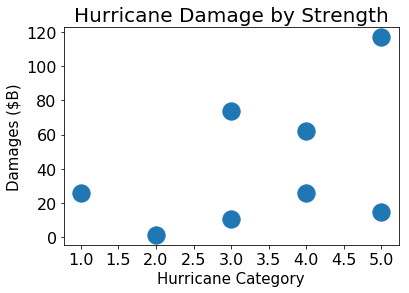

In [4]:
x=[5,5,4,4,3,3,2,1]
y=[14.9,116.9,62,25.9,10.8,73.5,1.3,26]
plt.scatter(x=[5,5,4,4,3,3,2,1], y=[14.9,116.9,62,25.9,10.8,73.5,1.3,26], s=300)
plt.ylabel('Damages ($B)', fontsize=15)
plt.xlabel('Hurricane Category', fontsize=15)
plt.title('Hurricane Damage by Strength', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

N = 8
data = [14.9,116.9,62,25.9,10.8,73.5,1.3,26]


plt.show()

There looks to be slight relationship, but not that strong. Thus it would not make sense to analyze multiple hurricanes by their category number.

Now we will add a column to categorize the counties that were impacted as a result of the hurricane based on https://www.fema.gov/disaster/4332

In [5]:
direct_affect = ['Aransas County', 'Austin County', 'Bastrop County',
                 'Bee County', 'Brazoria County', 'Caldwell County',
                 'Calhoun County', 'Chambers County', 'Colorado County',
                 'DeWitt County', 'Fayette County', 'Fort Bend County',
                 'Galveston County', 'Goliad County', 'Gonzales County', 
                 'Grimes County', 'Hardin County', 'Harris County',
                 'Jackson County', 'Jasper County', 'Jefferson County',
                 'Karnes County', 'Kleberg County', 'Lavaca County',
                 'Lee County', 'Liberty County', 'Matagorda County',
                 'Montgomery County', 'Newton County', 'Nueces County',
                 'Orange County', 'Polk County', 'Refugio County',
                 'Sabine County', 'San Jacinto County', 'San Patricio County',
                 'Tyler County', 'Victoria County', 'Walker County',
                 'Waller County', 'Wharton County']

In [6]:
#check how big
len(direct_affect)

41

In [7]:
#code to get other counties
list_of_counties = list(df['Area Name'].unique())

not_affect = [i for i in list_of_counties if i not in direct_affect]

Now let's add a new column to dataframe to distinguish the counties that were and were not affected.

In [8]:
#make dict to map to dataframe, so that directly affected counties are 1
dict1 = {}
for i in direct_affect:
    dict1[i] = 1
    

In [9]:
#maps the not_affected column to 0
for i in not_affect:
    dict1[i] = 0

In [10]:
#make new column
df['Was it impacted?'] = df['Area Name'].map(dict1)

In [11]:
df['Was it impacted?'].value_counts()

0    6809
1    1345
Name: Was it impacted?, dtype: int64

In [12]:
1345/(6809+1345)

0.1649497179298504

About 16% of the counties were impacted as result of the hurricane.

Since we only have average wages and employment, let's multiply them to determine the total weekly value for each industry.

In [13]:
df['Weekly Economic Value'] = df['Employment'] * df['Average Weekly Wages']

In [14]:
#test output
df.head(20)

,Unnamed: 0,Area Name,Quarter,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),Industry,FIPS,Was it impacted?,Weekly Economic Value
0,0,Anderson County,Second Quarter,109.0,1666.0,3.1,275.0,1.1,Leisure and Hospitality,48001.0,0,458150.0
1,1,Andrews County,Second Quarter,37.0,531.0,17.5,439.0,-0.9,Leisure and Hospitality,48003.0,0,233109.0
2,2,Angelina County,Second Quarter,157.0,3549.0,7.6,302.0,-0.3,Leisure and Hospitality,48005.0,0,1071798.0
3,3,Aransas County,Second Quarter,124.0,1660.0,6.8,335.0,-0.9,Leisure and Hospitality,48007.0,1,556100.0
4,4,Archer County,Second Quarter,8.0,60.0,50.0,222.0,-21.3,Leisure and Hospitality,48009.0,0,13320.0
5,5,Armstrong County,Second Quarter,3.0,25.0,NaN,291.0,NaN,Leisure and Hospitality,48011.0,0,7275.0
6,6,Atascosa County,Second Quarter,90.0,1273.0,11.8,290.0,7.4,Leisure and Hospitality,48013.0,0,369170.0
7,7,Austin County,Second Quarter,73.0,873.0,0.9,331.0,0.9,Leisure and Hospitality,48015.0,1,288963.0
8,8,Bailey County,Second Quarter,16.0,239.0,8.6,265.0,3.1,Leisure and Hospitality,48017.0,0,63335.0
9,9,Bandera County,Second Quarter,57.0,674.0,15.2,347.0,2.7,Leisure and Hospitality,48019.0,0,233878.0


## Cleaning and Adding Features <a name="cleaning"></a>

We have an extra column, we will remove.

In [15]:
df.drop(columns='Unnamed: 0', inplace=True)

In [16]:
df.head()

,Area Name,Quarter,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),Industry,FIPS,Was it impacted?,Weekly Economic Value
0,Anderson County,Second Quarter,109.0,1666.0,3.1,275.0,1.1,Leisure and Hospitality,48001.0,0,458150.0
1,Andrews County,Second Quarter,37.0,531.0,17.5,439.0,-0.9,Leisure and Hospitality,48003.0,0,233109.0
2,Angelina County,Second Quarter,157.0,3549.0,7.6,302.0,-0.3,Leisure and Hospitality,48005.0,0,1071798.0
3,Aransas County,Second Quarter,124.0,1660.0,6.8,335.0,-0.9,Leisure and Hospitality,48007.0,1,556100.0
4,Archer County,Second Quarter,8.0,60.0,50.0,222.0,-21.3,Leisure and Hospitality,48009.0,0,13320.0


## Further Data Analysis <a name="further"></a>

Let's take a look at which industries were most impacted, as defined by most amount of weekly economic value lost.

In [17]:
table = pd.pivot_table(df, values='Employment', index=['Industry'], columns=['Quarter'], aggfunc=np.sum)

In [18]:
table['Difference Q2-Q3'] = table['Third Quarter'] - table['Second Quarter']
table['Difference Q3-Q4'] = table['Fourth Quarter'] - table['Third Quarter']

In [19]:
table.sort_values(by = 'Difference Q2-Q3')

Quarter,Fourth Quarter,Second Quarter,Third Quarter,Difference Q2-Q3,Difference Q3-Q4
Industry,,,,,
Leisure and Hospitality,1307430.0,1350777.0,1311788.0,-38989.0,-4358.0
Other Services,322341.0,328494.0,322443.0,-6051.0,-102.0
Construction,699378.0,698628.0,693766.0,-4862.0,5612.0
Information,192351.0,193639.0,189323.0,-4316.0,3028.0
Manufacturing,845373.0,838260.0,838989.0,729.0,6384.0
"Trade,Transportation, and Utilities",2451244.0,2351375.0,2352115.0,740.0,99129.0
Education and Health Services,1612553.0,1597333.0,1598115.0,782.0,14438.0
Unclassified,12403.0,9535.0,10848.0,1313.0,1555.0
Financial Activities,723964.0,716574.0,719789.0,3215.0,4175.0


Leisure and hospitality was hurt the most, losing almost 40K workers. This makes sense since in a time of crisis, people likely won't have time or money to spend on recreational activities, thus resulting in less employees. <br>

It is interesting that some industries saw *increases* in employment after the hurricane, particularly Professional and Business Services.

So that summarizes the industries at an employment level, but what about wages?

In [20]:
table = pd.pivot_table(df, values='Weekly Economic Value', index=['Industry'], columns=['Quarter'], aggfunc=np.sum)

In [21]:
diff_df = pd.DataFrame(table)

In [22]:
diff_df['Difference Q2-Q3'] = diff_df['Third Quarter'] - diff_df['Second Quarter']

diff_df['Q2-Q3 Diff Percentage'] = round((diff_df['Difference Q2-Q3'] / diff_df['Second Quarter'])*100,2)

diff_df['Difference Q3-Q4'] = diff_df['Fourth Quarter'] - diff_df['Third Quarter']

diff_df['Q3-Q4 Diff Percentage'] = round((diff_df['Difference Q3-Q4'] / diff_df['Third Quarter'])*100,2)

In [23]:
df_sorted_by_diff = diff_df.sort_values(by='Difference Q2-Q3', ascending=True)

In [24]:
df_sorted_by_diff

Quarter,Fourth Quarter,Second Quarter,Third Quarter,Difference Q2-Q3,Q2-Q3 Diff Percentage,Difference Q3-Q4,Q3-Q4 Diff Percentage
Industry,,,,,,,
Education and Health Services,1.547016e+09,1.432776e+09,1.414001e+09,-18775265.0,-1.31,133014580.0,9.41
Construction,9.217212e+08,8.175273e+08,8.054290e+08,-12098305.0,-1.48,116292175.0,14.44
Leisure and Hospitality,5.520103e+08,5.407083e+08,5.296090e+08,-11099310.0,-2.05,22401350.0,4.23
Manufacturing,1.243734e+09,1.161630e+09,1.151652e+09,-9977551.0,-0.86,92082142.0,8.00
Financial Activities,1.117233e+09,9.999778e+08,9.919718e+08,-8005995.0,-0.80,125261257.0,12.63
"Trade,Transportation, and Utilities",2.346717e+09,2.142298e+09,2.137561e+09,-4736870.0,-0.22,209156543.0,9.78
Other Services,2.442335e+08,2.300305e+08,2.273139e+08,-2716590.0,-1.18,16919636.0,7.44
Information,3.004403e+08,2.890702e+08,2.890399e+08,-30302.0,-0.01,11400461.0,3.94
Unclassified,9.256046e+06,6.352795e+06,8.364953e+06,2012158.0,31.67,891093.0,10.65


Despite Leisure and Hospitality losing the most workers, the Education and Health Services industry actually suffered the most economic loss. Again professional and business services saw an increase, and the same is true of natural resources/mining.

Let's plot this to see if anything else jumps out.

In [25]:
#get list of industries
list_of_ind = ['Education and Health Services', 'Construction',
       'Leisure and Hospitality', 'Manufacturing', 'Financial Activities',
       'Trade,Transportation, and Utilities', 'Other Services', 'Information',
       'Unclassified', 'Natural Resources and Mining',
       'Professional and Business Services']

In [26]:
q2_list = list(df_sorted_by_diff['Second Quarter']/1000000)
q3_list = list(df_sorted_by_diff['Third Quarter']/1000000)
q4_list = list(df_sorted_by_diff['Fourth Quarter']/1000000)

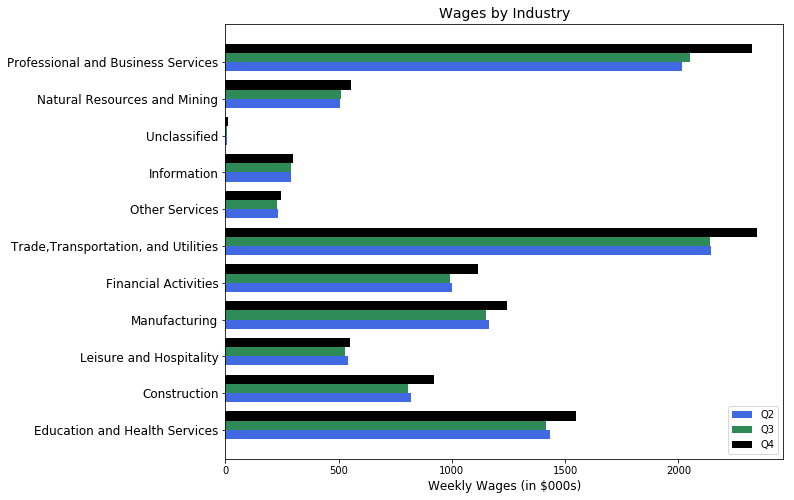

In [27]:
#https://stackoverflow.com/questions/51610707/two-stacked-bar-charts-as-sub-plots-any-references
N = 11

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
rects1 = ax.barh(ind, q2_list, width, color='royalblue',)


rects2 = ax.barh(ind+width, q3_list, width, color='seagreen',)

rects3 = ax.barh(ind+width+width, q4_list, width, color='k',)

# add some
ax.set_xlabel('Weekly Wages (in $000s)', fontsize=12)
ax.set_title('Wages by Industry', fontsize=14)
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(list_of_ind, fontsize=12 )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Q2', 'Q3', 'Q4') )

plt.show()

Overall, the largest difference in economic impact came from from Q3 to Q4 following the dip from Q2-Q3. This reflects the slight downtrend that the quarterly data was able to pick up and speaks to the need for a smaller timeframe for the data ie weekly and monthly instead of quarterly sources for our metrics.

Here we will look at only the counties that received aid from the hurricane and see if there are any trends.

In [28]:
#create piv table
impacted_table = pd.pivot_table(df, values='Weekly Economic Value',
                                index=['Was it impacted?'],
                                columns=['Quarter'], aggfunc=np.sum)


In [29]:
impacted_df = pd.DataFrame(impacted_table)

In [30]:
#calculate differences
impacted_df['Third Quarter'] = impacted_df['Third Quarter'] / 1000
impacted_df['Second Quarter'] = impacted_df['Second Quarter'] / 1000
impacted_df['Fourth Quarter'] = impacted_df['Fourth Quarter'] / 1000

In [31]:
impacted_df['Q2-Q3 Difference'] = impacted_df['Third Quarter'] - impacted_df['Second Quarter']
impacted_df['Q3-Q4 Difference'] = impacted_df['Fourth Quarter'] - impacted_df['Third Quarter']

In [32]:
impacted_df['Q2-Q3 Difference Percentage'] = round(impacted_df['Q2-Q3 Difference'] / impacted_df['Second Quarter']*100,2)
impacted_df['Q3-Q4 Difference Percentage'] = round(impacted_df['Q3-Q4 Difference'] / impacted_df['Third Quarter']*100, 2)

In [33]:
impacted_df

Quarter,Fourth Quarter,Second Quarter,Third Quarter,Q2-Q3 Difference,Q3-Q4 Difference,Q2-Q3 Difference Percentage,Q3-Q4 Difference Percentage
Was it impacted?,,,,,,,
0,7383240.503,6719628.834,6708581.931,-11046.903,674658.572,-0.16,10.06
1,3782059.878,3425217.423,3410430.834,-14786.589,371629.044,-0.43,10.90


Let's plot this again to see if anything jumps out.

In [34]:
non_impacted_data = [6719.628834, 6708.581931, 7383.240503]

In [35]:
impacted_data = [3425.217423, 3410.430834, 3782.059878]

In [36]:
#convert weekly wages to quarterly
fourth_q = [7383.240503*13, 3782.059878*13]

third_q = [6708.581931*13, 3410.430834*13]

second_q = [6719.628834*13, 3425.217423*13]

In [37]:
#calculate percentage change
non_impact_change = (third_q[0] - second_q[0]) / second_q[0]
impact_change = (third_q[1] - second_q[1]) / second_q[1]

#print %
print(impact_change)
print(non_impact_change)

non_impact_change_fourth = (fourth_q[0] - third_q[0]) / third_q[0]
impact_change_fourth = (fourth_q[1] - third_q[1]) / third_q[1]

print(impact_change_fourth)
print(non_impact_change_fourth)

-0.0043169782159549076
-0.001643975176739728
0.10896835681142568
0.10056649511611969


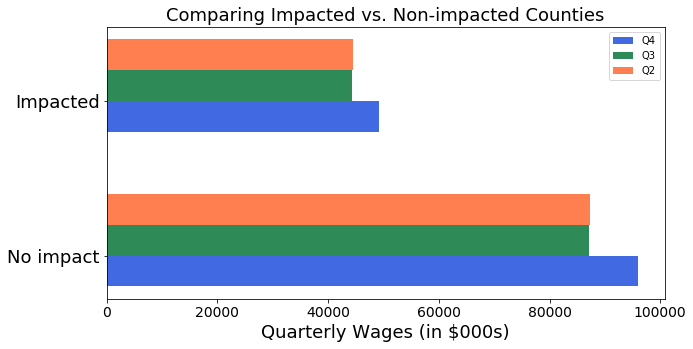

In [38]:
#https://stackoverflow.com/questions/51610707/two-stacked-bar-charts-as-sub-plots-any-references
N = 2

ind = np.arange(N)  # the x locations for the groups
width = 0.2     # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
rects1 = ax.barh(ind, fourth_q, width, color='royalblue',)




rects2 = ax.barh(ind+width, third_q, width, color='seagreen',)
rects3 = ax.barh(ind+width+width, second_q, width, color='coral',)


# add some
#plt.ylim((2000, 75000))  
ax.set_xlabel('Quarterly Wages (in $000s)', fontsize=18)
ax.set_title('Comparing Impacted vs. Non-impacted Counties', fontsize=18)
ax.set_yticks(ind + width / 2)
plt.xticks(fontsize=14, )
ax.set_yticklabels(['No impact','Impacted'], fontsize=18,  )
ax.legend( (rects1[0], rects2[0],rects3[0]), ('Q4', 'Q3','Q2'), fontsize=10 )

plt.show()

This again does not meet out expectations. Although the counties that were impacted did see a larger decrease from Q2-Q3, both groups of counties jumped right back up in Q4. Thus, it is possible the larger decrease from Q2-Q3 was driven by random variation and may not be related to the hurricane at all.

## Conclusions and Recommendations <a name="concl"></a>

Despite our shortcomings in generating a working model, we did uncover some interesting short term trends in the aftermath of Hurricane Harvey. Interestingly, certain industries experienced wage increases while most others suffered. For example, the Mining and Professional Services industries both saw gains of approximately 1.7%, while other industries such as Education and Health Services saw a drop in weekly wages of 1.3%. Harris County was one of the most impacted, as they bore the brunt of the losses in both Construction as well as Leisure and Hospitality (10 million and 2 million dollars, respectively).

As we transitioned from predicting the economic losses to analyzing Harvey, we did outside research on historical hurricanes’ strength in Category ranking and their associated normalized economic impact. What we found was that there is an extremely large amount of variance in the economic losses sustained by hurricane-hit locations. As discussed prior, we believe that this is directly impacted by not only the strength of the hurricane, but also the amount of rain, geographic location, industries affected and finally population size and density. 

In attempting to build a predictive model, we recommend obtaining more granular data from other hurricanes, in regards to timeframe and storm details such as quantified wind and rain measurements. Ideally it would consist of all the available data for all known hurricanes, not limited to the US. Additionally, we theorized that clustering the locations prone to hurricanes would yield more actionable information. In total, this equates to nearly an entire overhaul of the current hurricane measurement system, which we believe to be severely lacking in its singular measurement of peak sustained wind speed.
